In [1]:
import os
import numpy as np

In [2]:
path_to_series = os.path.join("..", "examples", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)
series = (series - np.mean(series)) / np.std(series)
fs = 128  # sampling frequency

In [3]:
# uncomment this code block for the multivariate ECG example:
path_to_series = os.path.join("..", "examples", "datasets", "mitdb_patient214.csv")
f = open(path_to_series)
series = np.array([line.split(',') for line in f.readlines()], dtype=np.double)
series = (series - np.mean(series, axis=None)) / np.std(series, axis=None)

fs = 360  # sampling frequency

In [4]:
print(series.shape)

(3600, 2)


In [5]:
# z-normalize time series
# series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.5

# Number of motifs to be found
nb_motifs = 2

# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

In [6]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho=rho, nb=nb_motifs, overlap=overlap)
print(motif_sets)

[((1056, 1342), [(1056, 1342), (1902, 2146), (2678, 2941), (629, 1048), (3163, 3502), (2336, 2675), (1, 270), (1560, 1902)]), ((1342, 1559), [(1342, 1559), (2146, 2327), (2941, 3156)])]


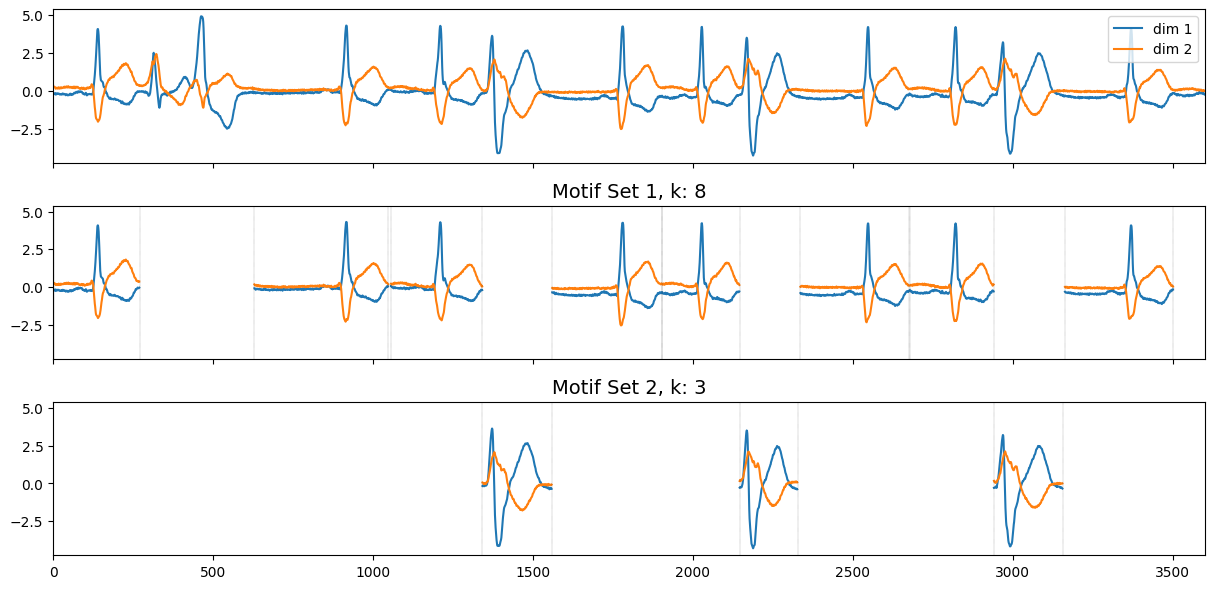

In [7]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [8]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

[((3252, 3500), [(3252, 3500), (2430, 2678), (1662, 1910), (799, 1047), (1092, 1340), (2703, 2951), (22, 270), (1910, 2158)]), ((1434, 1661), [(1434, 1661), (3024, 3251)])]


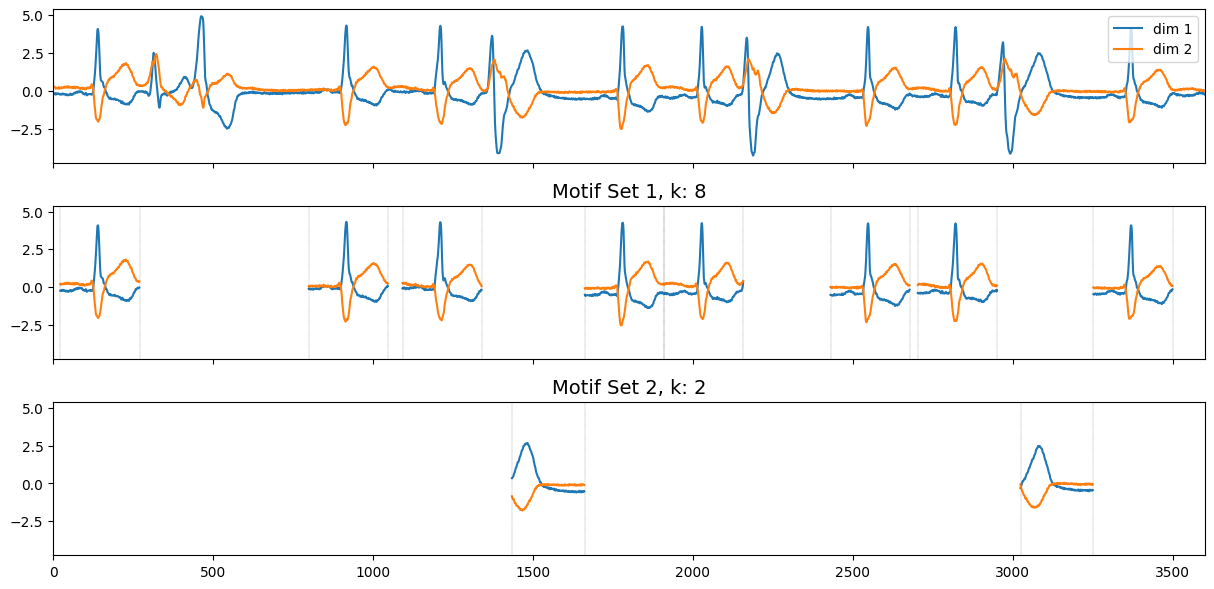

In [9]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [10]:
# start_mask specifies whether a motif can start at a certain time index (same for end_mask)

# for example: a candidate segment can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [11]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[((2666, 2931), [(2666, 2931), (1892, 2136), (1038, 1332), (616, 1035), (3177, 3489), (2341, 2665), (1619, 1892), (1, 260)]), ((2931, 3162), [(2931, 3162), (2136, 2340), (1332, 1565)])]


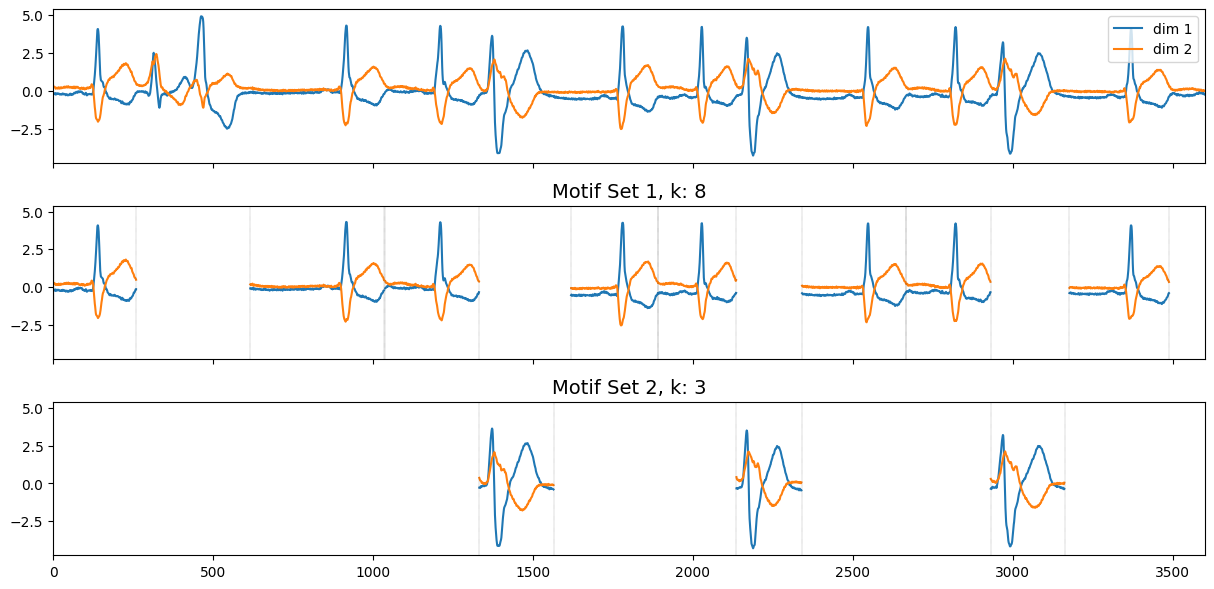

In [12]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()